In [ ]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import re
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithm
from sklearn.ensemble import RandomForestClassifier

#Data Load

In [ ]:
#Read and fetch data from .csv file present in the specified directory and store it in declared variable. 
data=pd.read_csv('Titanic_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#EDA

In [ ]:
data.head(10) #displaying the first 10 index of dataset of titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
total = data.isnull().sum().sort_values(ascending=False) #sum of number of missing values in the dataset
percent_1 = data.isnull().sum()/data.isnull().count()*100 #converting it into percentage
percent_2 = (round(percent_1, 1)).sort_values(ascending=False) #rounding the percentage value
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])  #preparing the table for display
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


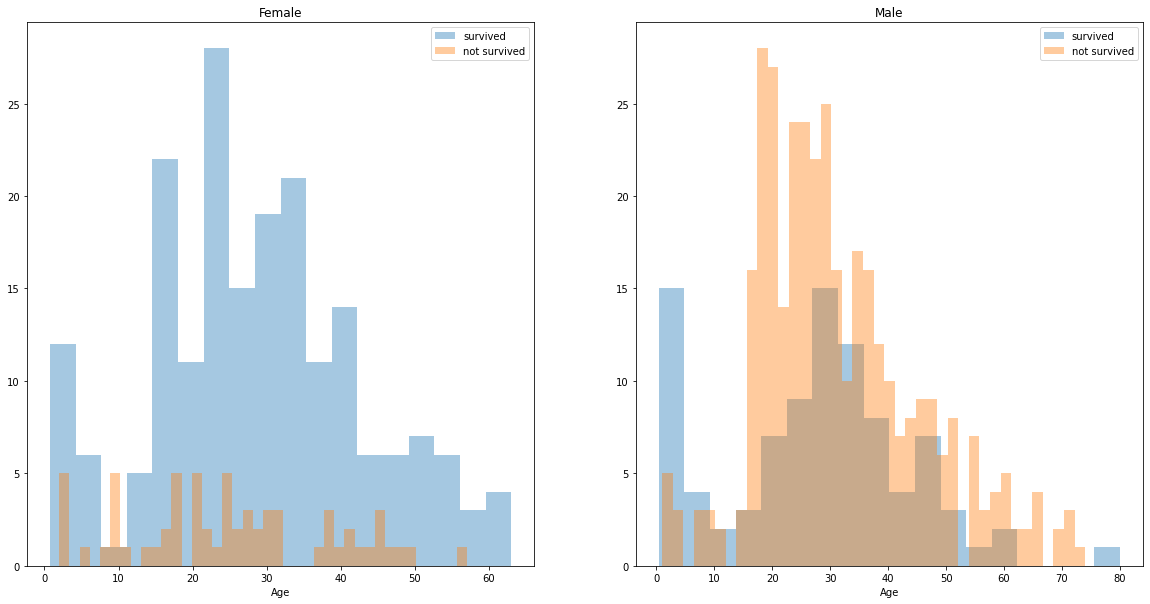

In [ ]:
# Plotting of Number of survivals against age and sex
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 10)) #declaraing the plotting figure size
women = data[data['Sex']=='female']  #storing the female sex count from titanic dataset in declared variable 'Women'
men = data[data['Sex']=='male']     #storing the male sex count from titanic dataset in declared variable 'Men'
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False) #handling data for plotting of females sex that have survived
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False) #handling data for plotting of females sex that have not survived
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)  #handling data for plotting of males sex that have survived
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False) #handling data for plotting of males sex that have not survived
ax.legend()
_ = ax.set_title('Male')

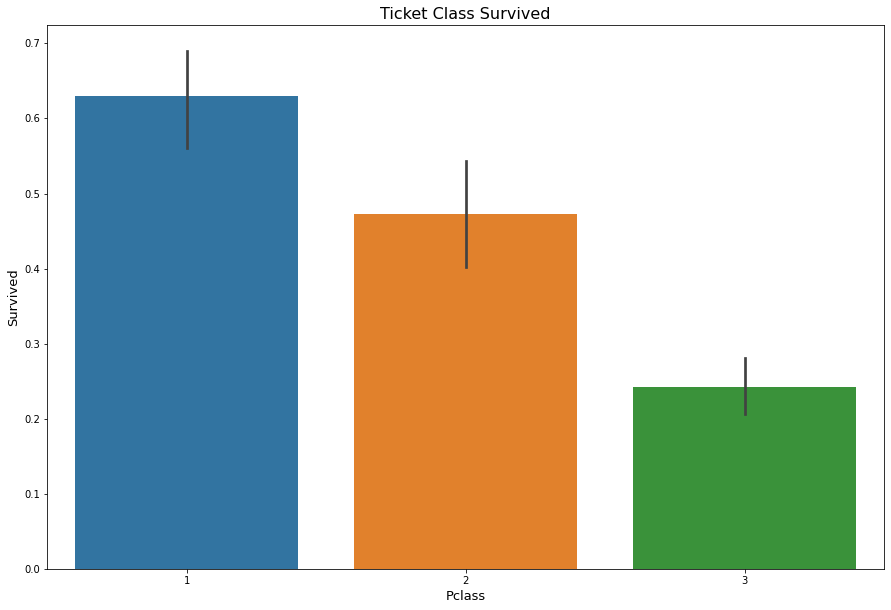

In [ ]:
# Percentage of survived passangers belonging to different ticket class
plt.figure(figsize=(15,10))
plt.xlabel('xlabel', fontsize=13)
plt.ylabel('ylabel', fontsize=13)
plt.title("Ticket Class Survived",fontsize=16)
sns.barplot(x='Pclass', y='Survived', data=data)

#Data Preprocessing

In [ ]:
# Dropping the Passanger Id and Ticket number as this information is useless and couldnt help us in predicting the survived passangers.
data = data.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)

In [ ]:
#Filling the missing values of age by finding the mean and standard deviation first. Then generate random numbers using mean and standard deviation and fill the gaps.
df = [data]

for dataset in df:
    mean = data["Age"].mean()
    std = data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = data["Age"].astype(int)

In [ ]:
#As most of the data contains Embarked value 'S' means that most of the passangers present in the ship were from Southampton embark.
common_value = 'S'
df = [data]

for dataset in df:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
#As can be seen from the data that Fare values are present in float-datatype. We have to convert it into integer to simplify our data
df = [data]

for dataset in df:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
# Labeling gender from string to numerical values to help ML models to extract features
genders = {"male": 0, "female": 1}
df = [data]

for dataset in df:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
#Similarly, Embarked (Ports) Character is converted to numerical value
ports = {"S": 0, "C": 1, "Q": 2}
df = [data]

for dataset in df:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [ ]:
#This cell makes block of ages and provide unique label each block. The age of the passangers in the ship is labeled according to the block it lies.
df = [data]
for dataset in df:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0   #Assigned 0 label to passanger of age 11 or less
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
    

In [ ]:
# Blocks labeling of fares
df = [data]

for dataset in df:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
#Train test split
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(['Survived'],axis=1), 
                                                    data['Survived'], test_size=0.10)

#Model Design and Training

In [ ]:
# Random forest model
rf_model = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf_model.fit(X_train, Y_train) 
Y_pred_rf_test = rf_model.predict(X_test)

#Model Evaluation

In [ ]:
print("Testing accuracy of the algorithm is: ", round(accuracy_score(Y_test, Y_pred_rf_test), 2))

Testing accuracy of the algorithm is:  0.89


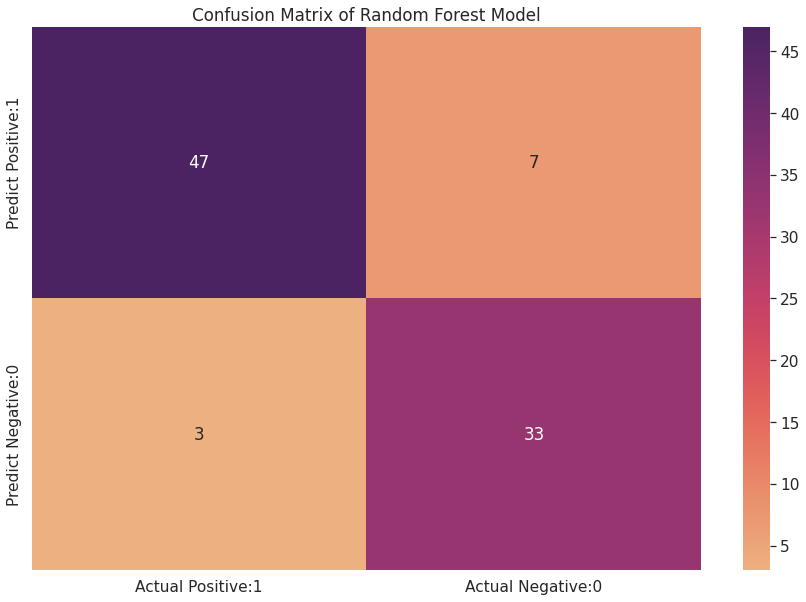

In [ ]:
# Perparing Confusuin Matrix
cm3=confusion_matrix(Y_test,Y_pred_rf_test)
cm_matrix3 = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
plt.figure(figsize=(15,10))
plt.title("Confusion Matrix of Random Forest Model")
sns.set(font_scale=1.4)
sns.heatmap(cm_matrix3, annot=True, fmt='d', cmap='flare')